In [1]:
import pandas as pd
import numpy as np
import scipy
import regression as reg

import netpixi
import graph_tool_extras as gte

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def from_net_to_dataframe(net):
    data = {}
    for v in net.vertices():
        for key, value in v.items():
            key = key.replace(' ', '_')
            if key not in data.keys():
                data[key] = []
            data[key].append(value)
    return pd.DataFrame(data)

In [3]:
g = gte.load('./rede_metricas.net.gz')

In [4]:
data = from_net_to_dataframe(g)
data.sort_values('closeness', ascending=False)

,id,aisle,name,purchased_once,purchased_more_than_once,number_of_users_purchased,total_purchases,PRC,_x,_y,closeness,betweenness,degree,clustering
3,24852,fresh fruits,Banana,57186,18939,76125,491291,0.248788,3.588382,8.478414,0.934030,0.518699,0.869692,0.008331
0,13176,fresh fruits,Bag of Organic Bananas,47063,18592,65655,394930,0.283177,3.934164,8.694963,0.827833,0.186446,0.658601,0.014521
2,21137,fresh fruits,Organic Strawberries,39871,21258,61129,275577,0.347756,3.861830,8.659128,0.756889,0.050575,0.518689,0.022804
5,21903,packaged vegetables fruits,Organic Baby Spinach,38095,18671,56766,251705,0.328912,3.873161,8.669384,0.732189,0.035743,0.470671,0.026512
1,47209,fresh fruits,Organic Hass Avocado,30047,14657,44704,220877,0.327868,3.892099,8.657171,0.729506,0.036799,0.465305,0.026944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,8372,cat food care,Salmon & Sole Feast Cat Food,26,32,58,204,0.551724,1.553725,7.607988,0.243522,0.000000,0.000094,0.000000
7744,36690,cat food care,Ocean Whitefish & Tuna Feast in Sauteed Seafoo...,44,40,84,248,0.476190,1.524582,7.675992,0.243522,0.000000,0.000094,0.000000
9128,5340,popcorn jerky,"Turkey Jerky, Lemon Garlic",36,42,78,235,0.538462,1.823875,7.292689,0.243475,0.000000,0.000094,0.000000
8778,34079,hot cereal pancake mixes,Oatmeal Blueberry & Hazelnut Cup,54,114,168,300,0.678571,5.856152,9.294773,0.232746,0.000000,0.000094,0.000000


In [5]:
independente = data['clustering']
dependente = data['PRC']
controle = np.log(data['degree'])

data_hipotese = pd.DataFrame({
    'dependente': dependente, 
    'independente': independente, 
    'controle': controle
})

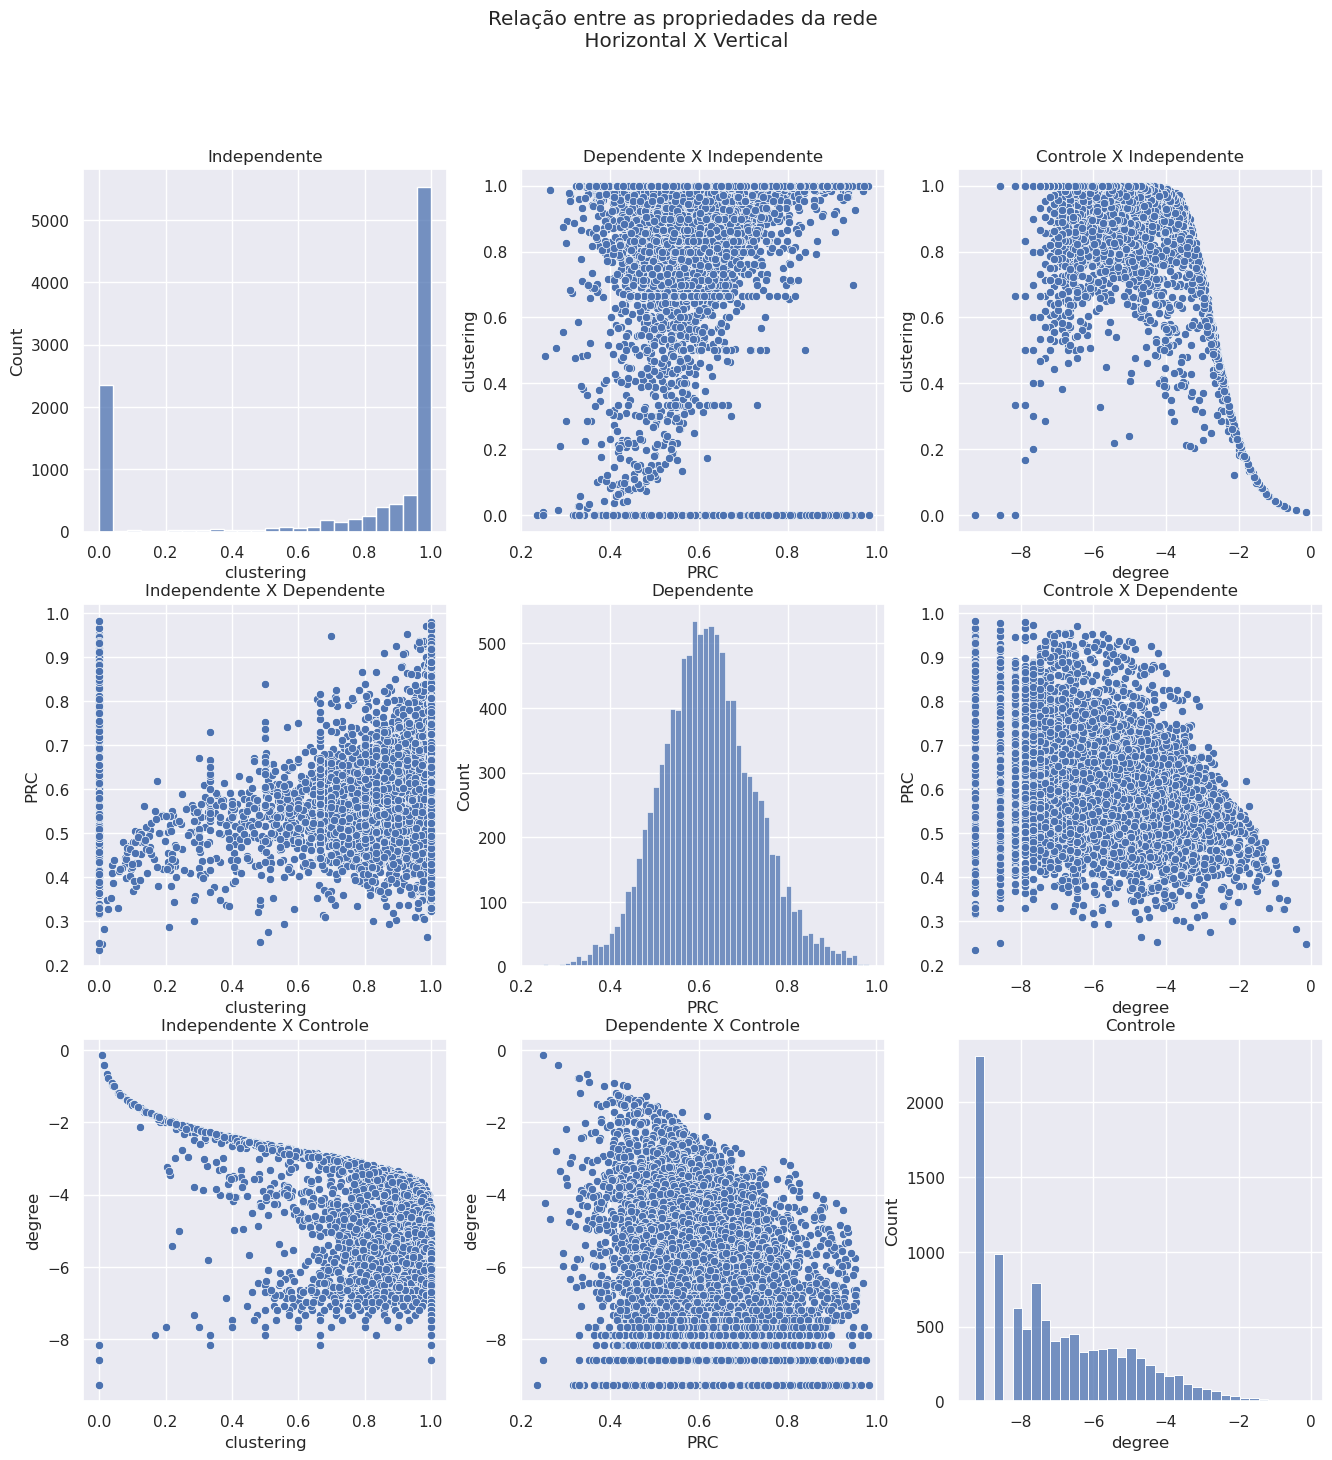

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

fig.suptitle("Relação entre as propriedades da rede\n Horizontal X Vertical")

sns.histplot(independente, ax=axes[0, 0]).set_title("Independente")
sns.scatterplot(x=dependente, y=independente, ax=axes[0, 1]).set_title("Dependente X Independente")
sns.scatterplot(x=controle, y=independente, ax=axes[0, 2]).set_title("Controle X Independente")

sns.scatterplot(x=independente, y=dependente, ax=axes[1, 0]).set_title("Independente X Dependente")
sns.histplot(dependente, ax=axes[1, 1]).set_title("Dependente")
sns.scatterplot(x=controle, y=dependente, ax=axes[1, 2]).set_title("Controle X Dependente")

sns.scatterplot(x=independente, y=controle, ax=axes[2, 0]).set_title("Independente X Controle")
sns.scatterplot(x=dependente, y=controle, ax=axes[2, 1]).set_title("Dependente X Controle")
sns.histplot(controle, ax=axes[2, 2]).set_title("Controle")

plt.show()

In [7]:
def pearsonr(x, y, ndigits=10):
    statistic, p_value = scipy.stats.pearsonr(x, y)
    
    asterisk = ''
    statistic = round(statistic, ndigits)
    
    if statistic == 1: 
        asterisk = ' (óbvio)'
    elif p_value < 0.01: 
        asterisk = ' ***'
    elif p_value < 0.05: 
        asterisk = ' **'
    elif p_value < 0.1: 
        asterisk = ' *'
        
    return f'{statistic} {asterisk}'

In [8]:
columns = ['independente', 'dependente', 'controle']
pd.DataFrame([[pearsonr(data_hipotese[j], data_hipotese[i]) for j in columns] for i in columns], columns=columns)

,independente,dependente,controle
0,1.0 (óbvio),-0.0584436244 ***,0.4513937318 ***
1,-0.0584436244 ***,1.0 (óbvio),-0.3064140675 ***
2,0.4513937318 ***,-0.3064140675 ***,1.0 (óbvio)


In [9]:
result = reg.linear(data=data_hipotese, formula='dependente ~ independente + controle') # dependente à esquerda!
result.micro_summary()

variable,coefficient,std error,p-value
independente,0.026515,0.002724,0.000000
controle,-0.019970,0.000585,0.000000


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dependente   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     602.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.49e-248
Time:                        13:30:05   Log-Likelihood:                 9216.5
No. Observations:               10622   AIC:                        -1.843e+04
Df Residuals:                   10619   BIC:                        -1.841e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4616      0.005     85.672      0.000       0.451       0.472
independente     0.0265      0.003      9.733      0.000       0.021       0.032
controle        -0.0200      0.001    -34.124      0.000      -0.021      -0.019
==============================================================================
Omnibus:                      151.687   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.251
Skew:                           0.246   Prob(JB):                     2.39e-38
Kurtosis:                       3.386   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

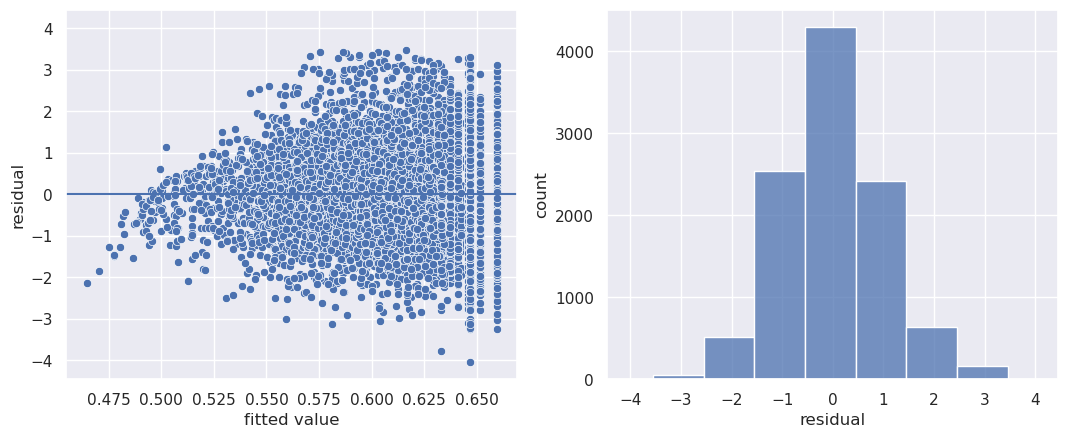

In [11]:
result.plot_residuals()

In [15]:
import os
if not os.path.isdir('img'):
    os.mkdir('img')

sns.histplot(independente).get_figure().savefig('./img/hist_independente.png')
plt.close()
sns.scatterplot(x=dependente, y=independente).get_figure().savefig('./img/dependente_independente.png')
plt.close()
sns.scatterplot(x=controle, y=independente).get_figure().savefig('./img/controle_independente.png')
plt.close()

sns.scatterplot(x=independente, y=dependente).get_figure().savefig('./img/independente_dependente.png')
plt.close()
sns.histplot(dependente).get_figure().savefig('./img/hist_dependente.png')
plt.close()
sns.scatterplot(x=controle, y=dependente).get_figure().savefig('./img/controle_dependente.png')
plt.close()

sns.scatterplot(x=independente, y=controle).get_figure().savefig('./img/independente_controle.png')
plt.close()
sns.scatterplot(x=dependente, y=controle).get_figure().savefig('./img/dependente_controle.png')
plt.close()
sns.histplot(controle).get_figure().savefig('./img/hist_controle.png')
plt.close()